# **Waze Project**
**Regression analysis: Simplify complex data relationships**

# **Regression modeling**


**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.

## **PACE: Plan**



consider the following questions:

1.   What are you being asked to do?
> _Predict if a customer will churn or be retained._

2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a Waze user won't churn, but they actually will)?
  > _Waze will fail to take proactive measures to retain users who are likely to stop using the app. For example, Waze might proactively push an app notification to users, or send a survey to better understand user dissatisfaction._
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a Waze user will churn, but they actually won't)?
  > _Waze may take proactive measures to retain users who are NOT likely to churn. This may lead to an annoying or negative experience for loyal users of the app._
3.   Do the benefits of such a model outweigh the potential problems?
  > _The proactive measueres taken by Waze might have unintended effects on users, and these effects might encourage user churn. Follow-up analysis on the effectiveness of the measures is recommended. If the measures are reasonable and effective, then the benefits will most likely outweigh the problems._
4.   Would you proceed with the request to build this model? Why or why not?

  >_Yes. There aren't any significant risks for building such a model._


### **Imports and data loading**


In [1]:

# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle
from pprint import pprint

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('waze_dataset.csv')

## **PACE: Analyze**

Purposes of EDA before constructing a binomial logistic regression model

> *Outliers and extreme data values can significantly impact logistic
regression models. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.*

>  *EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with dataset means, medians, and other similar methods.*

> *Additionally, it can be useful to create variables by multiplying variables together or calculating the ratio between two variables. For example, in this dataset you can create a drives_sessions_ratio variable by dividing drives by sessions.*

### **Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



In [3]:
print(df.shape)

df.info()

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


the `label` column is missing 700 values.*

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
df = df.drop('ID', axis=1)

Checking the class balance of the dependent (target) variable, `label`.

In [6]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [7]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


> *All of these columns have max values that are multiple standard deviations above the 75th percentile. This could indicate outliers in these variables.*

### **Feature engineering**

#### **`km_per_driving_day`**

In [8]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [9]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`percent_sessions_in_last_month`**


In [10]:
# Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### **`total_sessions_per_day`**


In [11]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

In [12]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

#### **`km_per_drive`**


In [13]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [14]:
# Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**


In [15]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_drives_to_favorite'] = (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']
df['percent_of_drives_to_favorite'].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_drives_to_favorite, dtype: float64

#### **`professional_driver`**

Binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

In [16]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [17]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

### **Preparing variables**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   label                           14299 non-null  object 
 1   sessions                        14999 non-null  int64  
 2   drives                          14999 non-null  int64  
 3   total_sessions                  14999 non-null  float64
 4   n_days_after_onboarding         14999 non-null  int64  
 5   total_navigations_fav1          14999 non-null  int64  
 6   total_navigations_fav2          14999 non-null  int64  
 7   driven_km_drives                14999 non-null  float64
 8   duration_minutes_drives         14999 non-null  float64
 9   activity_days                   14999 non-null  int64  
 10  driving_days                    14999 non-null  int64  
 11  device                          14999 non-null  object 
 12  km_per_driving_day              

In [19]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

#### **Impute outliers**

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

According to descriptive statistics, seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.



In [20]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

In [21]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.449837,0.338207,190.730963,232.269197,1.676347,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.286863,1.319814,339.926138,616.197409,9.021250,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000298,72.013095,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890,0.050818,90.649402,32.486524,0.206064,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310,0.100457,122.105845,72.947059,0.653572,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251,0.215210,193.238449,179.347527,1.643183,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.530637,39.763874,23642.920871,15777.426560,777.563629,1.000000


#### **Encode categorical variables**

In [22]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df['device2'] = np.where(df['device']=='Android', 0, 1)

df[['label', 'label2','device','device2']].tail()

,label,label2,device,device2
14994,retained,0,iPhone,1
14995,retained,0,Android,0
14996,retained,0,iPhone,1
14997,churned,1,iPhone,1
14998,retained,0,iPhone,1


In [23]:
# Isolate predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])
# Isolate target variable
y = df['label2']

## **PACE: Construct**

### **Logistic Regression Modeling**

**Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [24]:
# Generate a correlation matrix
X.corr(method='pearson')

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,percent_sessions_in_last_month,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,professional_driver,device2
drives,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,-0.010989,0.614282,0.083300,0.006026,-0.320554,-0.101281,0.444425,0.011684
total_sessions,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,-0.016167,-0.113491,0.163831,0.004026,-0.191705,-0.147460,0.254433,0.012138
n_days_after_onboarding,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,0.011764,-0.000874,-0.302693,0.010772,0.004090,-0.007920,0.003770,-0.011299
total_navigations_fav1,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,-0.000197,0.015180,-0.002820,-0.011952,-0.005389,0.179979,-0.000224,-0.001316
total_navigations_fav2,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.006751,0.000603,-0.000412,0.008835,0.003198,0.034281,0.007126,-0.000275
driven_km_drives,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,0.344811,-0.002092,0.014383,0.100906,0.225912,-0.005198,-0.000904,-0.002091
duration_minutes_drives,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,0.239627,-0.007884,0.010044,-0.253618,0.169051,-0.000689,-0.012128,-0.007709
activity_days,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,-0.397433,0.017840,-0.004602,-0.011961,-0.005193,0.009665,0.453825,-0.010221
km_per_driving_day,-0.010989,-0.016167,0.011764,-0.000197,0.006751,0.344811,0.239627,-0.397433,1.000000,-0.006958,0.001527,0.043121,0.095109,-0.000258,-0.165966,0.002979
percent_sessions_in_last_month,0.614282,-0.113491,-0.000874,0.015180,0.000603,-0.002092,-0.007884,0.017840,-0.006958,1.000000,-0.029885,0.004464,-0.323536,0.034872,0.295284,0.003460


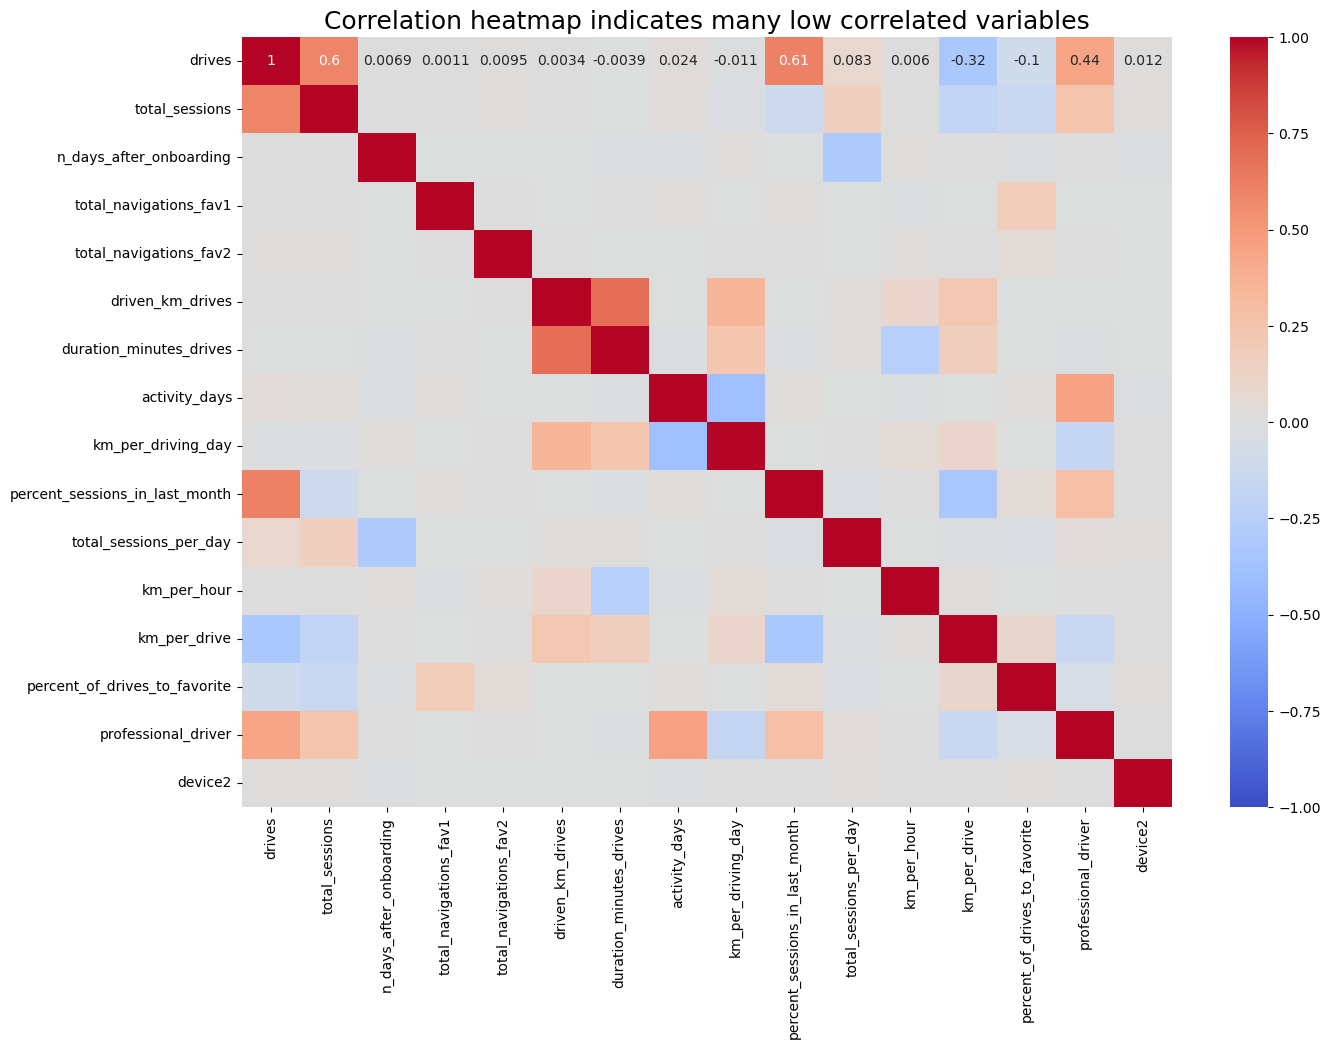

In [25]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

#### **Split the data**

In [26]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

It is important to add `penalty = 'none'` since your predictors are unscaled.

In [27]:
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)


LogisticRegression(max_iter=400, penalty='none')

Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

In [28]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values(inplace=True)

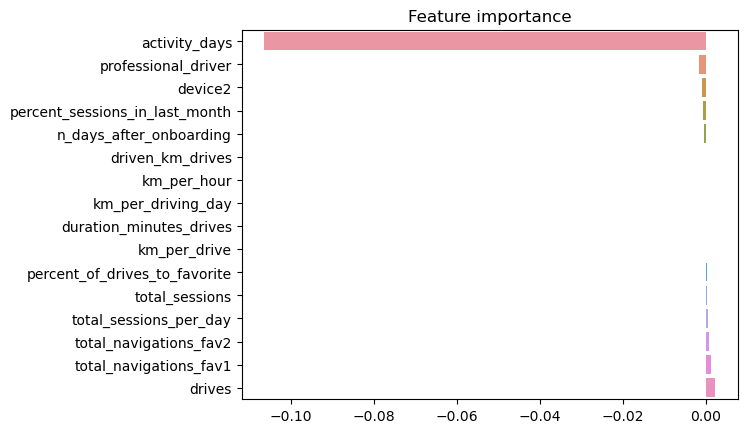

In [29]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x for x in feature_importance],
            y=[x for x in feature_importance.index],
            orient='h')
plt.title('Feature importance');

Call the model's `intercept_` attribute to get the intercept of the model.

In [30]:
model.intercept_

array([-0.00180432])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

In [31]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.94258335, 0.05741665],
       [0.58220045, 0.41779955],
       [0.7668284 , 0.2331716 ],
       ...,
       [0.92210745, 0.07789255],
       [0.85101641, 0.14898359],
       [0.935635  , 0.064365  ]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$


In [32]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `activity_days`.

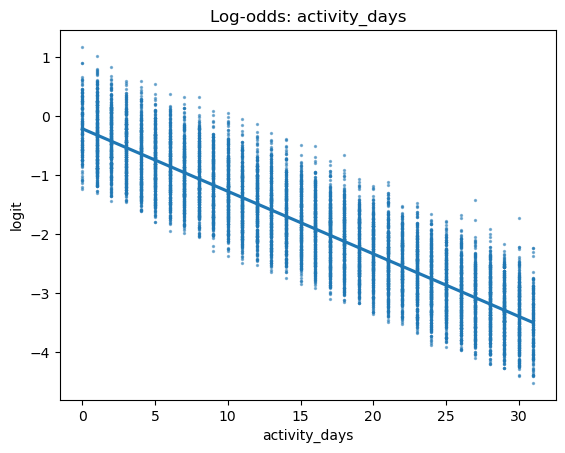

In [33]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

### **Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

In [34]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

In [35]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8232167832167833

### **Show results with a confusion matrix**

In [36]:
cm = confusion_matrix(y_test, y_preds)

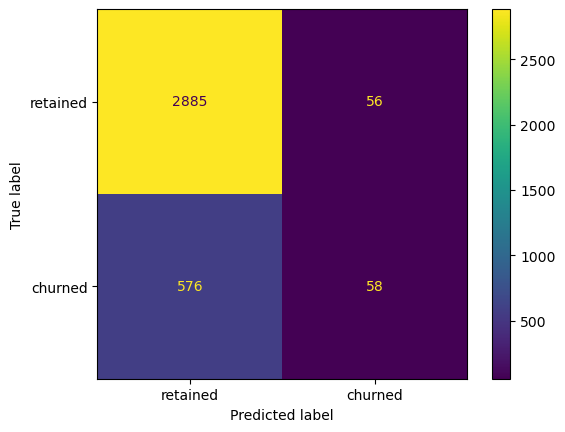

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

We can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [38]:
# Calculate precision manually
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5087719298245614

In [39]:
# Calculate recall manually
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.0914826498422713

In [40]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.51      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.67      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



**Note:** The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **Random Forest Modeling**

In [41]:
from sklearn.model_selection import PredefinedSplit

X_tr, X_val, y_tr, y_val = train_test_split( X_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

split_index= [ 0 if x in X_val.index else -1 for x in X_train.index ]
custom_split = PredefinedSplit(split_index)

In [42]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

#  Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2,4],
             'max_features': [.04,.02,.03],
             'max_samples': [.05,.07,.1],
             'min_samples_leaf': [2,4],
             'min_samples_split': [.04,.07,.1],
             'n_estimators': [50,75,90],
             }

#  Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

#  Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='recall')

In [43]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 40.2 s, sys: 46.5 ms, total: 40.3 s
Wall time: 40.3 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4],
                         'max_features': [0.04, 0.02, 0.03],
                         'max_samples': [0.05, 0.07, 0.1],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [0.04, 0.07, 0.1],
                         'n_estimators': [50, 75, 90]},
             refit='recall', scoring={'accuracy', 'precision', 'f1', 'recall'})

In [44]:
def model_evaluation(model_object):
    print("Training\n")
    print('Best Score:       ',model_object.best_score_,end='\n')
    print('Best paramaters : ',model_object.best_params_,end='\n\n')
    
    print("Testing\n")
    pred = model_object.best_estimator_.predict(X_test)
    print('Recall   :',recall_score(y_test,pred).round(3),end='\n')
    print('Precision:',precision_score(y_test,pred).round(3),end='\n')
    print('Accuracy :',accuracy_score(y_test,pred).round(3),end='\n')
    print('F1 Score :',f1_score(y_test,pred).round(3),end='\n')

    cm = confusion_matrix(y_test,pred)
    ConfusionMatrixDisplay(cm).plot()    

Training

Best Score:        0.0
Best paramaters :  {'max_depth': 2, 'max_features': 0.04, 'max_samples': 0.05, 'min_samples_leaf': 2, 'min_samples_split': 0.04, 'n_estimators': 50}

Testing

Recall   : 0.0
Precision: 0.0
Accuracy : 0.823
F1 Score : 0.0


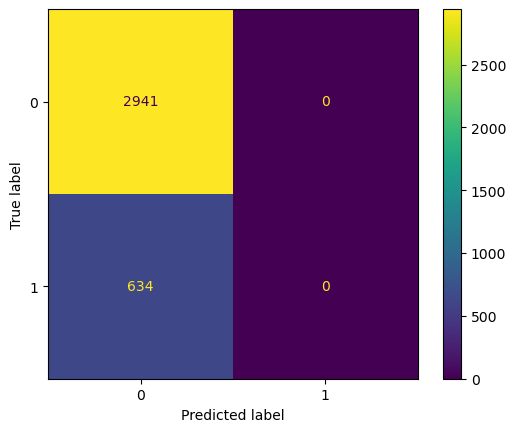

In [45]:
model_evaluation(rf_cv)

### **XGBoost**

In [46]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [ 8, 10],
             'min_child_weight': [ 6,7,8],
             'learning_rate': [ 0.1,0.2,0.3],
             'n_estimators': [300,350,400]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=custom_split, refit='recall')

In [47]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 6min 30s, sys: 1.84 s, total: 6min 32s
Wall time: 51.5 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [8, 10],
                         'min_child_weight': [6, 7, 8],
                         'n_estimators': [300, 350, 400]},
             refit='recall', scoring={'accuracy', 'precision', 'f1', 'recall'})

Training

Best Score:        0.20789473684210527
Best paramaters :  {'learning_rate': 0.3, 'max_depth': 10, 'min_child_weight': 8, 'n_estimators': 300}

Testing

Recall   : 0.186
Precision: 0.36
Accuracy : 0.797
F1 Score : 0.245


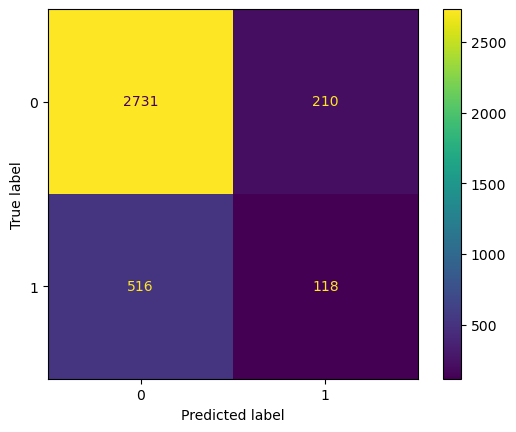

In [48]:
model_evaluation(xgb_cv)

## **PACE: Execute**


### **Feature importance**

Use the `plot_importance` function to inspect the most important features of your final model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

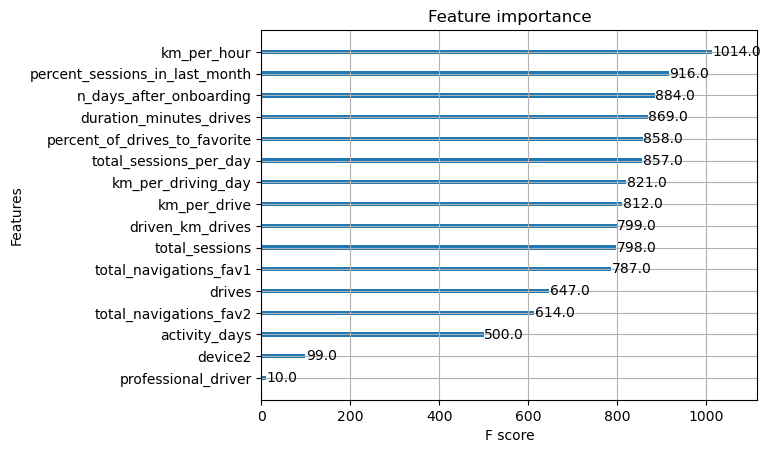

In [49]:
plot_importance(xgb_cv.best_estimator_)

### **Conclusion**


> If model's used to drive consequential business decisions, then it's not recommend using the model for churn prediction. The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value.


> Logistic regression models are easier to interpret. Because they assign coefficients to predictor variables, they reveal not only which features factored most heavily into their final predictions, but also the directionality of the weight. In other words, they tell you if each feature is positively or negatively correlated with the target in the model's final prediction._


> Tree-based model ensembles are often better predictors. If the most important thing is the predictive power of the model, then tree-based modeling will usually win out against logistic regression (but not always!). They also require much less data cleaning and require fewer assumptions about the underlying distributions of their predictor variables, so they're easier to work with._


> New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. In the case of this model, the engineered features made up over half of the top 10 most-predictive features used by the model. It could also be helpful to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features._


> It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs._
